### Student Name: Aidan Keeshan
### Student ID: 18200117

# E-tivity 3: Clustering and Manifold Learning

Use this notebook to complete Tasks 1 and 2 in E-tivity3.

### Import Python Modules

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn import manifold
from sklearn import cluster
from sklearn import preprocessing

In [2]:
df = pd.read_csv("loans_dataset_et3.csv")
"|".join(df.columns.values)

'ApplicantIncome|CoapplicantIncome|LoanAmount|Loan_Amount_Term|Credit_History'

In [3]:
df.head(5)

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
0,2483,2466.0,90,180,0
1,4917,0.0,130,360,0
2,4106,0.0,40,180,1
3,3859,3300.0,142,180,1
4,6417,0.0,157,180,1


In [4]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,332.000000,332.000000,332.000000,332.000000,332.000000
mean,5201.093373,1495.508795,140.882530,341.710843,0.978916
std,4584.815491,1982.742932,75.544237,61.651497,0.143882
min,645.000000,0.000000,17.000000,60.000000,0.000000
25%,2912.750000,0.000000,100.000000,360.000000,1.000000
50%,3858.500000,1211.500000,128.000000,360.000000,1.000000
75%,5818.250000,2250.000000,162.000000,360.000000,1.000000
max,39999.000000,20000.000000,600.000000,480.000000,1.000000


In [5]:
data = np.array(df.values, dtype=float)

In [6]:
min_max_scaler = preprocessing.MinMaxScaler()
data = min_max_scaler.fit_transform(data)

In [7]:
[0:5,:] #head numpy

array([[0.04670427, 0.1233    , 0.12521441, 0.28571429, 0.        ],
       [0.10855313, 0.        , 0.19382504, 0.71428571, 0.        ],
       [0.08794532, 0.        , 0.03945111, 0.28571429, 1.        ],
       [0.08166895, 0.165     , 0.21440823, 0.28571429, 1.        ],
       [0.1466687 , 0.        , 0.24013722, 0.28571429, 1.        ]])

In [8]:
colors = np.array(['red', 'blue', 'lime', 'indigo', 'khaki', 'pink', 'green', 'purple'])

# points - a 2D array of (x,y) coordinates of data points
# labels - an array of numeric labels in the interval [0..k-1], one for each point
# centers - a 2D array of (x, y) coordinates of cluster centers
# title - title of the plot

def clustering_scatterplot(points, labels, centers, title):
    # plot the examples, i.e. the data points
    
    n_clusters = np.unique(labels).size
    for i in range(n_clusters):
        h = plt.scatter(points[labels==i,0],
                        points[labels==i,1], 
                        c=colors[i%colors.size],
                        label = 'cluster '+str(i))

    # plot the centers of the clusters
    if centers is not None:
        plt.scatter(centers[:,0], centers[:,1], s=100, facecolors='none', edgecolors='black',linewidth=3,)

    _ = plt.title(title)
    _ = plt.legend()
    _ = plt.xlabel('x')
    _ = plt.ylabel('y')

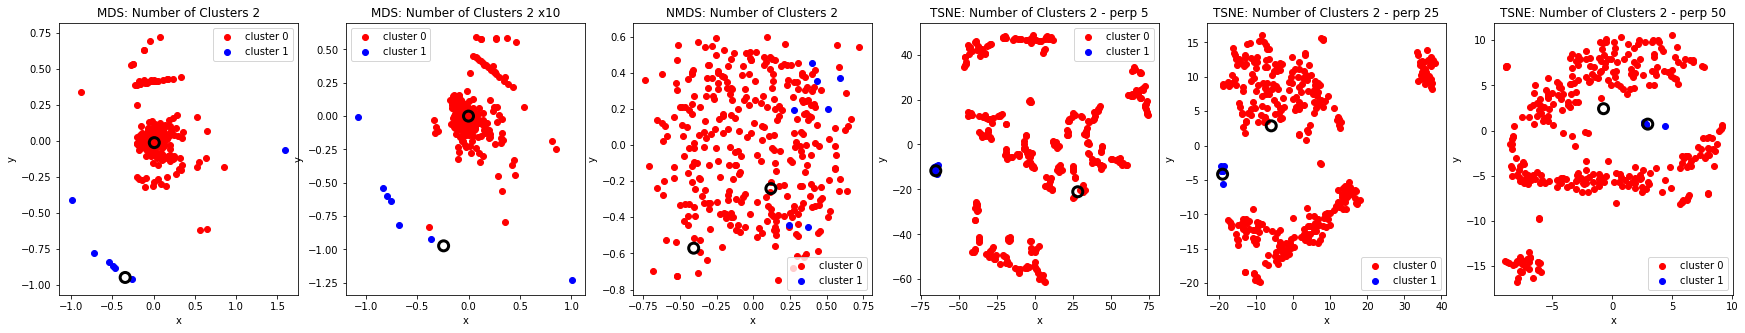

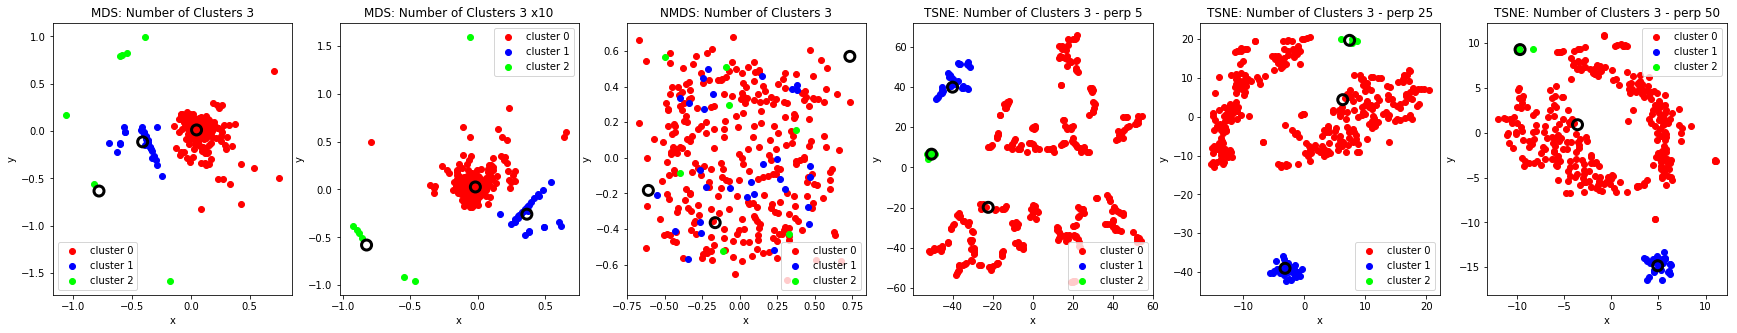

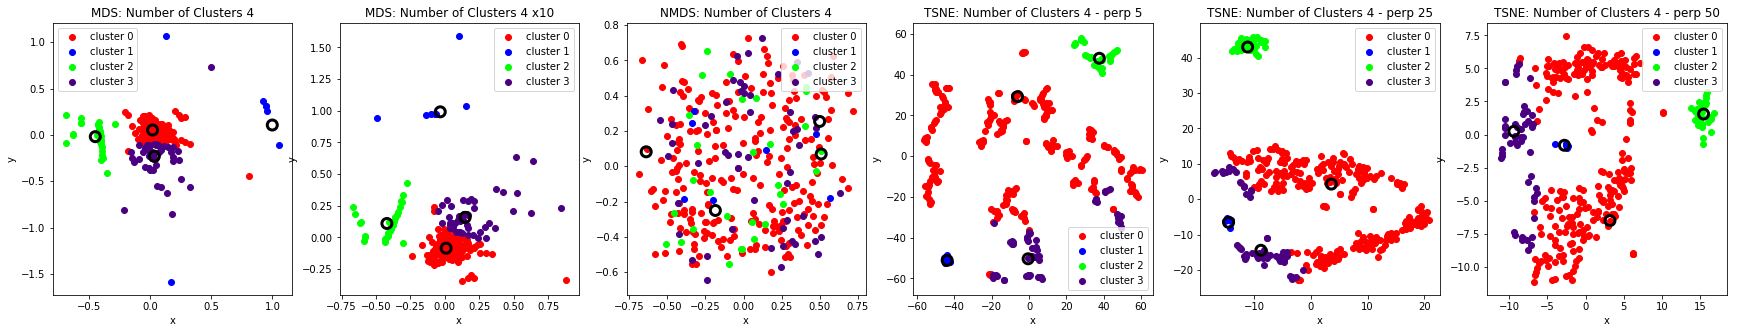

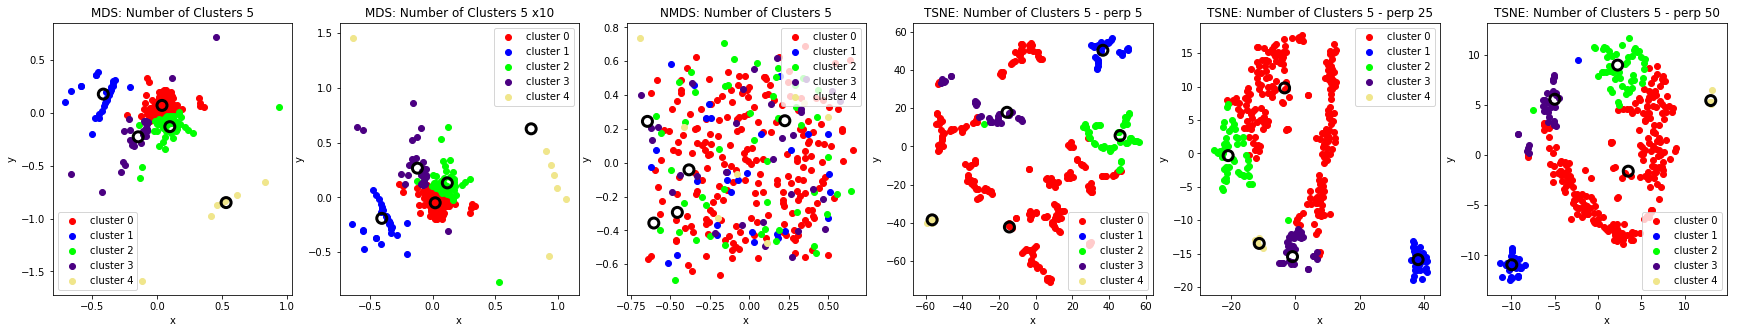

In [9]:
num_clust = 5

for k in range(2, num_clust+1):
    clustered_data_sklearn = cluster.KMeans(n_clusters=k, n_init=10, max_iter=300,n_jobs=8).fit(data)
    data_and_centers = np.r_[data,clustered_data_sklearn.cluster_centers_]

    f, axs = plt.subplots(1, 6, figsize=(30, 5))
    
    plt.subplot(1, 6, 1)
    XYcoord_mds = manifold.MDS(n_components=2,n_jobs=8).fit_transform(data_and_centers)
    clustering_scatterplot(points=XYcoord_mds[:-k,:],labels=clustered_data_sklearn.labels_,centers=XYcoord_mds[-k:,:],title='MDS: Number of Clusters {}'.format(k))

    plt.subplot(1, 6, 2)
    XYcoord_mds = manifold.MDS(n_components=2,n_init =10,n_jobs=8).fit_transform(data_and_centers)
    clustering_scatterplot(points=XYcoord_mds[:-k,:],labels=clustered_data_sklearn.labels_,centers=XYcoord_mds[-k:,:],title='MDS: Number of Clusters {} x10'.format(k))
    
    plt.subplot(1, 6, 3)
    XYcoord_mds = manifold.MDS(n_components=2,metric=False,n_jobs=8).fit_transform(data_and_centers)
    clustering_scatterplot(points=XYcoord_mds[:-k,:],labels=clustered_data_sklearn.labels_,centers=XYcoord_mds[-k:,:],title='NMDS: Number of Clusters {}'.format(k))


    plt.subplot(1, 6, 4)
    XYcoord_mds = manifold.TSNE(n_components=2,perplexity=5).fit_transform(data_and_centers)
    clustering_scatterplot(points=XYcoord_mds[:-k,:],labels=clustered_data_sklearn.labels_,centers=XYcoord_mds[-k:,:],title='TSNE: Number of Clusters {} - perp {}'.format(k,5))
    plt.subplot(1, 6, 5)
    XYcoord_mds = manifold.TSNE(n_components=2,perplexity=25).fit_transform(data_and_centers)
    clustering_scatterplot(points=XYcoord_mds[:-k,:],labels=clustered_data_sklearn.labels_,centers=XYcoord_mds[-k:,:],title='TSNE: Number of Clusters {} - perp {}'.format(k,25))
    plt.subplot(1, 6, 6)
    XYcoord_mds = manifold.TSNE(n_components=2,perplexity=50).fit_transform(data_and_centers)
    clustering_scatterplot(points=XYcoord_mds[:-k,:],labels=clustered_data_sklearn.labels_,centers=XYcoord_mds[-k:,:],title='TSNE: Number of Clusters {} - perp {}'.format(k,50))
    plt.show()

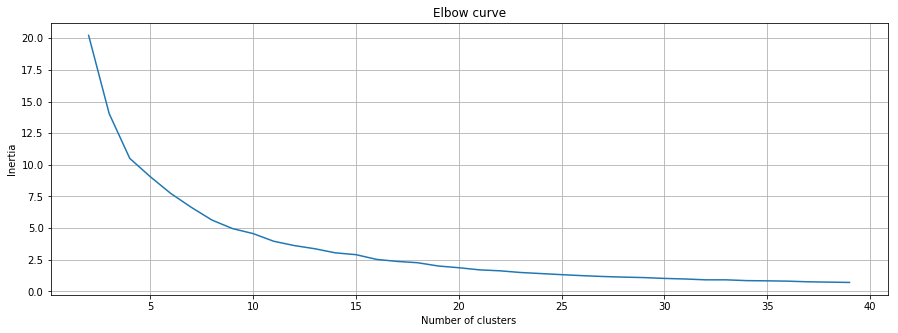

In [23]:
from sklearn.cluster import KMeans
num_clust = 40
distorsions = []
for k in range(2, num_clust):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(data)
    distorsions.append(kmeans.inertia_)

fig = plt.figure(figsize=(15, 5))
plt.plot(range(2, num_clust), distorsions)
plt.grid(True)
plt.title('Elbow curve')
plt.xlabel("Number of clusters")
plt.ylabel("Inertia")
plt.show()

## Number of Clusters
I have chosen 4 as the number of clusters based on the Elbow curve.   
The Silhouette indicates that 5 may be best as the groups are roughly same size.   
I spent a lot of time trying to get gap statistics to work but all seem to converge very late are not at all.   
There is not clear documentation around this as seems relatively new approach.


In [18]:
clustered_data_sklearn = cluster.KMeans(n_clusters=4, n_init=10, max_iter=300,n_jobs=8).fit(data)
df['cluster'] = pd.Series(clustered_data_sklearn.labels_, index=data.index)

In [19]:
df.groupby('cluster').mean()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
cluster,,,,,
0,10840.166667,1322.629630,246.296296,357.777778,1.0
1,3829.493776,1541.436183,118.419087,361.493776,1.0
2,5146.966667,1297.126666,116.333333,161.600000,1.0
3,9153.857143,2098.142857,206.285714,308.571429,0.0


## Clusters
Cluster 0 and 3 seem to be the high income applications but 3 has no credit history and the 2nd  income is more important.  
For 1 and 2 the have similar income and the same cried history.   
Also the loan amount is similar the differentiating factor seems to be the loan term. 


For n_clusters = 2 The average silhouette_score is : 0.7596807546208396
For n_clusters = 3 The average silhouette_score is : 0.5993683877939564
For n_clusters = 4 The average silhouette_score is : 0.49382717460168524
For n_clusters = 5 The average silhouette_score is : 0.32027717634881653
For n_clusters = 6 The average silhouette_score is : 0.32784578244617285


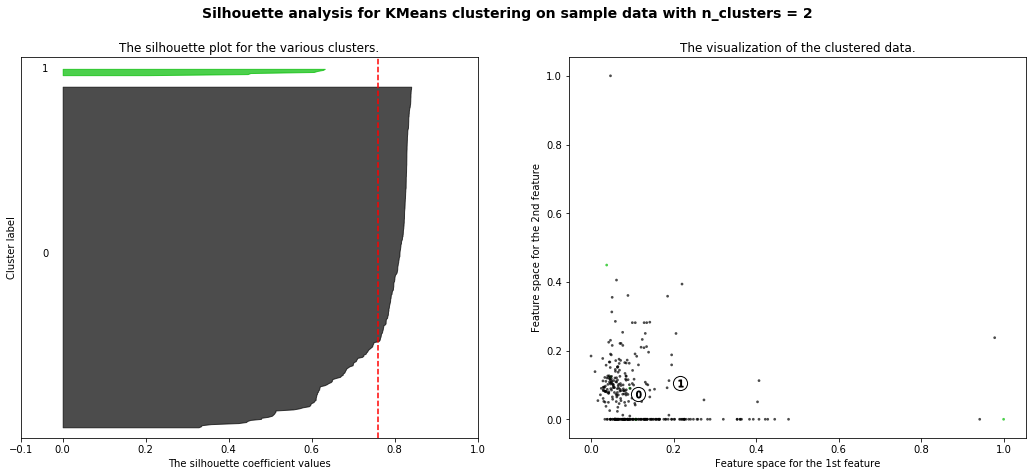

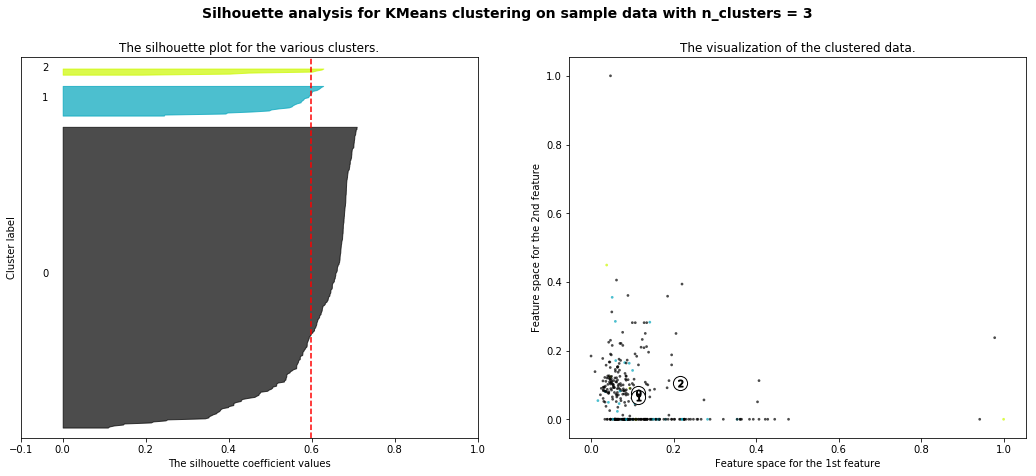

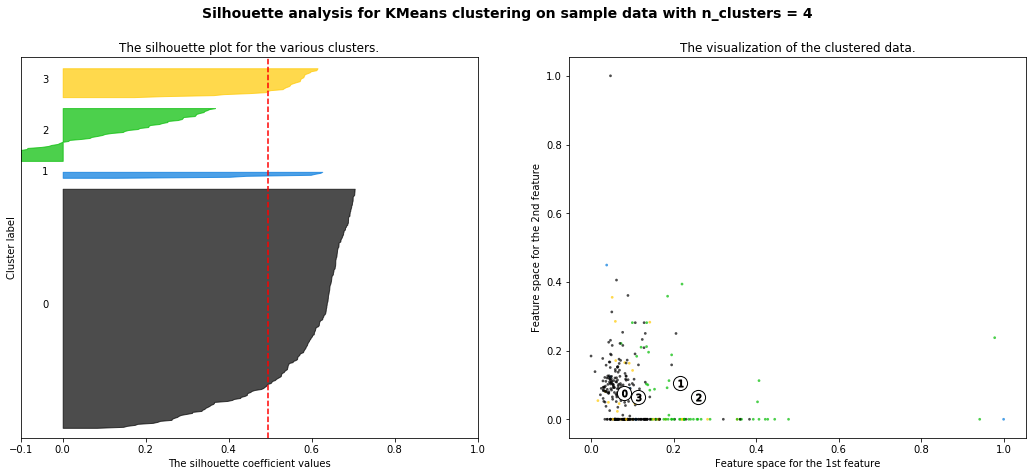

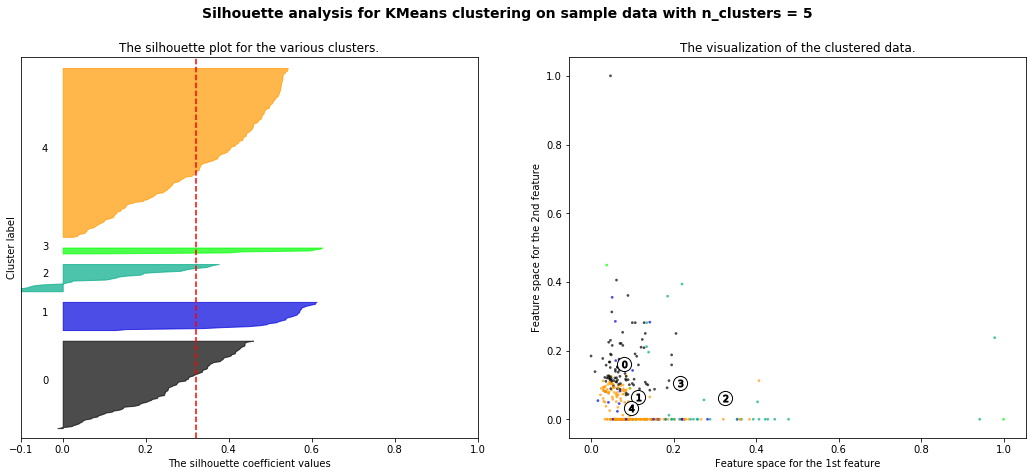

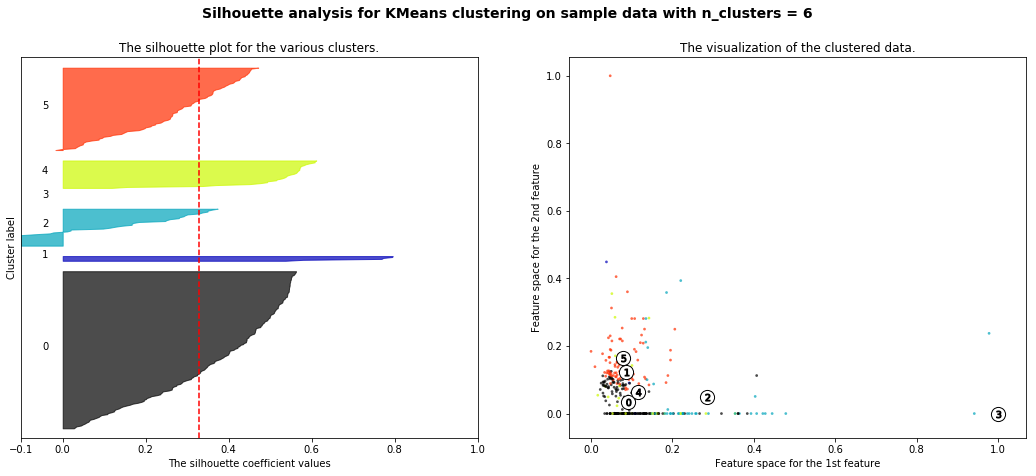

In [21]:
#https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html

from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

X = data

range_n_clusters = [2, 3, 4, 5, 6]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()

In [24]:
from gap_statistic import OptimalK
optimalK = OptimalK(parallel_backend='rust')
optimalK
n_clusters = optimalK(data, cluster_array=np.arange(1, 100))

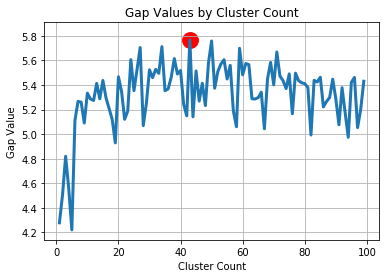

In [25]:
plt.plot(optimalK.gap_df.n_clusters, optimalK.gap_df.gap_value, linewidth=3)
plt.scatter(optimalK.gap_df[optimalK.gap_df.n_clusters == n_clusters].n_clusters,
            optimalK.gap_df[optimalK.gap_df.n_clusters == n_clusters].gap_value, s=250, c='r')
plt.grid(True)
plt.xlabel('Cluster Count')
plt.ylabel('Gap Value')
plt.title('Gap Values by Cluster Count')
plt.show()

In [38]:
from sklearn.cluster import MeanShift

bandwidth = cluster.estimate_bandwidth(data, quantile=0.8)
ms = MeanShift(bandwidth=bandwidth, bin_seeding=True, cluster_all=True)
model = ms.fit(data)
ms_labels = ms.labels_
ms_cluster_centers = ms.cluster_centers_

ms_labels_unique = np.unique(ms_labels)
ms_n_clusters_ = len(ms_labels_unique)

# append the cluster centers to the dataset
data_and_centers = np.r_[data, ms.cluster_centers_]

print("number of estimated clusters : %d" % ms_n_clusters_)

number of estimated clusters : 7
